Verifying accuracy of frontend against CCL

In [1]:
from halomodelpy import hm_calcs
import matplotlib.pyplot as plt
import pyccl as ccl
%matplotlib inline
import numpy as np
from halomodelpy import ccl_tools, redshift_helper, hubbleunits

In [2]:
# generate redshift distribution
# basically a delta function because by default CCL doesn't integrate over dndz for a spatial correlation
dndz = redshift_helper.dndz_from_z_list(np.random.normal(1.5, 0.001, 10000), 8)
# set up CCL object
cclob = ccl_tools.HOD_model(dndz[0])
# set up HaloModelPy object
hmob = hm_calcs.halomodel(dndz)
# ell values to compute angular power at 
ell = np.logspace(0, 4, 1000)

Text(0, 0.5, '$C_{\\ell}^{\\kappa g}$')

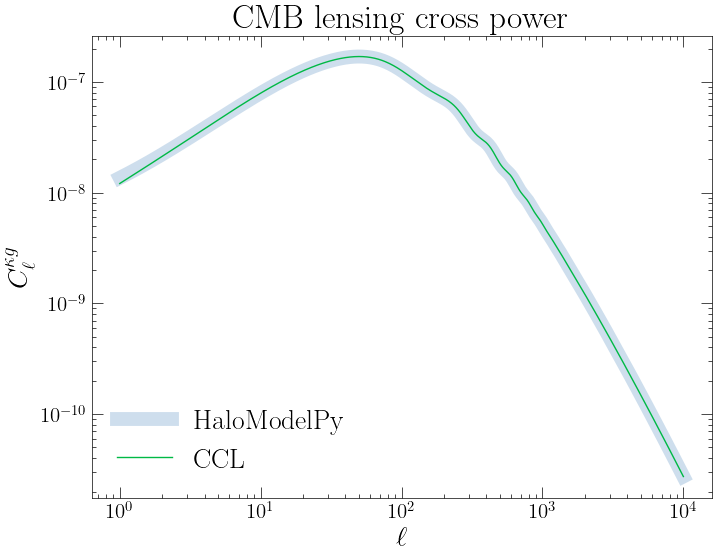

In [3]:
# a CCL unbiased matter "tracer"
clu1 = ccl.NumberCountsTracer(cclob.cosmo, has_rsd=False, dndz=dndz, bias=(dndz[0], np.ones_like(dndz[0])))
# CCL CMB lensing tracer
cmbl = ccl.CMBLensingTracer(cclob.cosmo, z_source=1090.)
# get power
cls_cmb_cross_lens1 = ccl.angular_cl(cclob.cosmo, clu1, cmbl, ell)


# get power in halomodelpy
plt.loglog(ell, hmob.get_c_ell_kg(ell), linewidth=10, alpha=0.2, label='HaloModelPy')
plt.loglog(ell, cls_cmb_cross_lens1, label='CCL')
plt.legend()
plt.title('CMB lensing cross power')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}^{\kappa g}$')

Text(0, 0.5, '$w(\\theta)$')

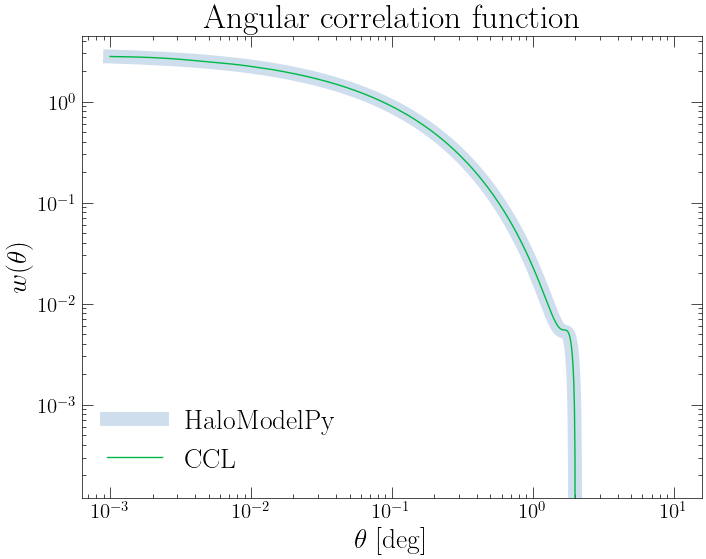

In [4]:
theta = np.logspace(-3, 1, 1000)
plt.loglog(theta, hmob.get_ang_cf(theta), linewidth=10, alpha=0.2, label='HaloModelPy')
plt.loglog(theta, ccl.correlation(cclob.cosmo, ell=ell, C_ell=ccl.angular_cl(cclob.cosmo, clu1, clu1, ell), theta=theta), label='CCL')
plt.legend()
plt.title("Angular correlation function")
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$w(\theta)$')

Timing halomodelpy angular correlation prediction vs CCL, 100 runs

In [5]:
import time
t0 = time.time()
for j in range(100):
    hmob.get_ang_cf(theta)
t_hmpy = time.time()-t0

t0 = time.time()
for j in range(100):
    ccl.correlation(cclob.cosmo, ell=ell, C_ell=ccl.angular_cl(cclob.cosmo, clu1, clu1, ell), theta=theta)
t_ccl = time.time()-t0

print(t_ccl/t_hmpy)

7.1106935852119415


HaloModelPy is faster 

Much faster to go directly from matter power to angular correlation
than to go first to Cl then w as CCL requires

Text(0.5, 1.0, 'Spatial correlation function')

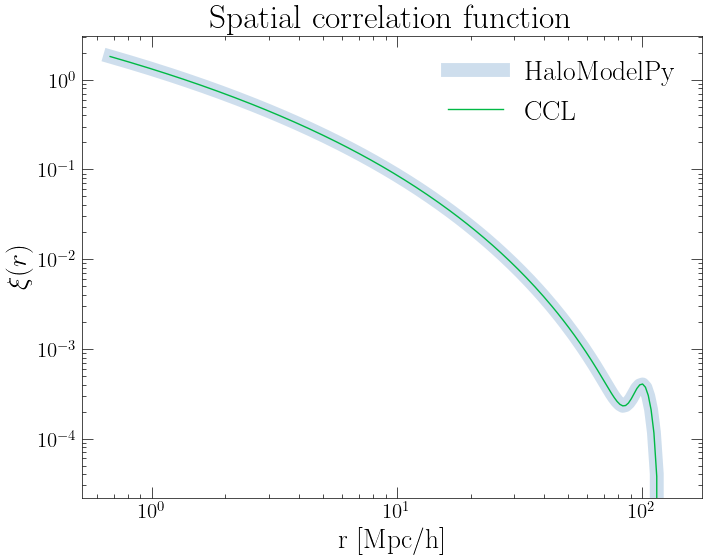

In [6]:
r = np.logspace(0, 2.3, 200)
r_hub = hubbleunits.add_h_to_scale(r)

plt.loglog(r_hub, hmob.get_spatial_cf(r_hub, projected=False), linewidth=10, alpha=0.2, label='HaloModelPy')
plt.loglog(r_hub, ccl.correlation_3d(cosmo=cclob.cosmo, r=r, a=ccl_tools.z_to_a(1.5)), label='CCL')
plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi(r)$')
plt.legend()
plt.title("Spatial correlation function")


Text(0, 0.5, '$C_{\\ell}^{g g}$')

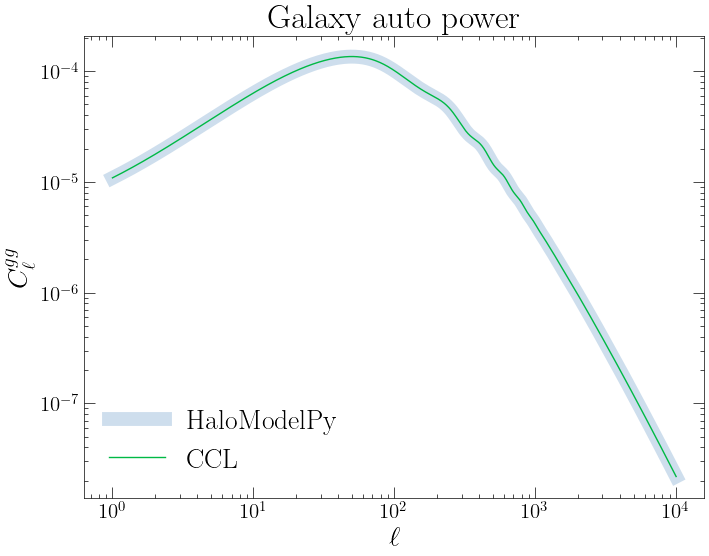

In [7]:
plt.loglog(ell, hmob.get_c_ell_gg(ell), linewidth=10, alpha=0.2, label='HaloModelPy')
plt.loglog(ell, ccl.angular_cl(cclob.cosmo, clu1, clu1, ell), label='CCL')
plt.legend()
plt.title('Galaxy auto power')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}^{g g}$')

Redshift-space

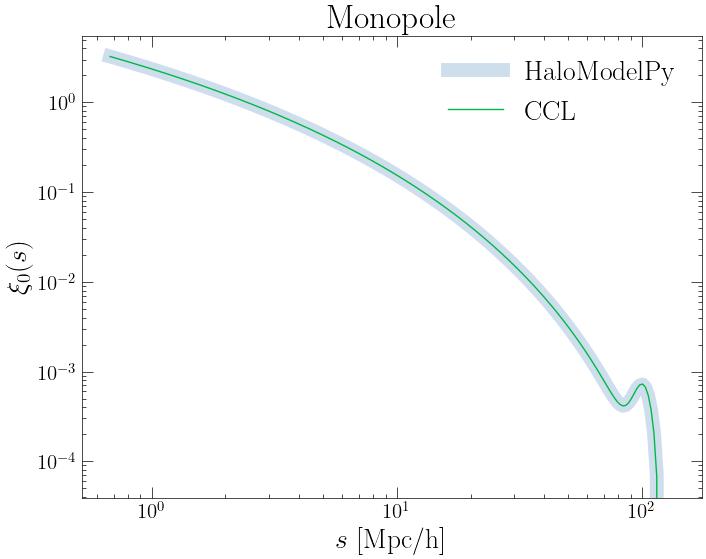

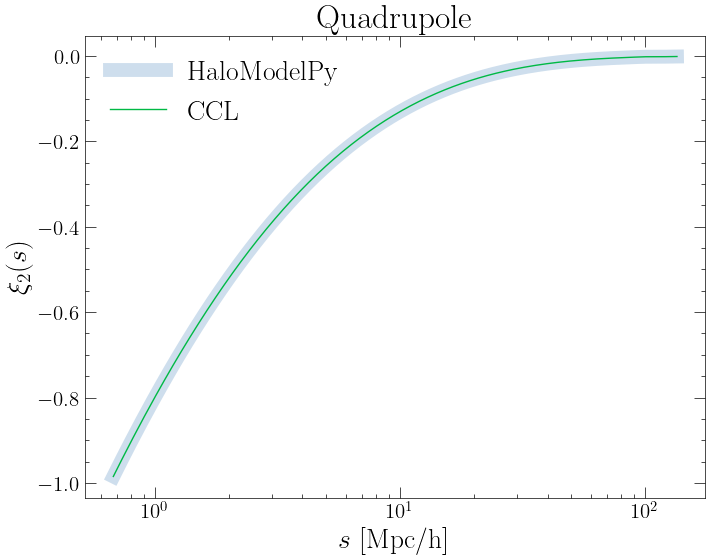

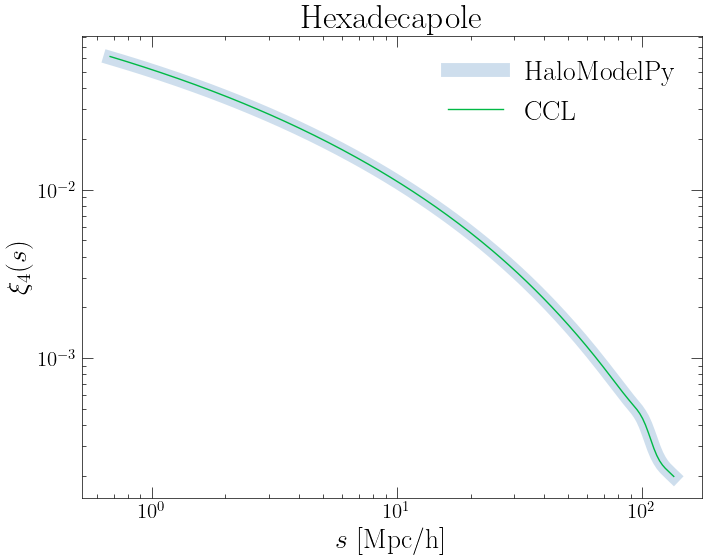

In [8]:
plt.figure()

plt.loglog(r_hub, hmob.get_multipole(r_hub, 0), linewidth=10, label='HaloModelPy', alpha=0.2)
plt.loglog(r_hub, ccl.correlation_multipole(cosmo=cclob.cosmo, r=r, a=ccl_tools.z_to_a(1.5), beta=hm_calcs.beta_param(1., 1.5), ell=0), label='CCL')
plt.xscale('log')
plt.xlabel(r'$s$ [Mpc/h]')
plt.ylabel(r"$\xi_{0}(s)$")
plt.title('Monopole')
plt.legend()

plt.figure()

plt.plot(r_hub, hmob.get_multipole(r_hub, 2), linewidth=10, label='HaloModelPy', alpha=0.2)
plt.plot(r_hub, ccl.correlation_multipole(cosmo=cclob.cosmo, r=r, a=ccl_tools.z_to_a(1.5), beta=hm_calcs.beta_param(1., 1.5), ell=2), label='CCL')
plt.xscale('log')
plt.xlabel(r'$s$ [Mpc/h]')
plt.ylabel(r"$\xi_{2}(s)$")
plt.title('Quadrupole')
plt.legend()

plt.figure()
plt.loglog(r_hub, hmob.get_multipole(r_hub, 4), linewidth=10, label='HaloModelPy', alpha=0.2)
plt.loglog(r_hub, ccl.correlation_multipole(cosmo=cclob.cosmo, r=r, a=ccl_tools.z_to_a(1.5), beta=hm_calcs.beta_param(1., 1.5), ell=4), label='CCL')
plt.xscale('log')
plt.xlabel(r'$s$ [Mpc/h]')
plt.ylabel(r"$\xi_{4}(s)$")
plt.title('Hexadecapole')
plt.legend()